In [1]:

!nvidia-smi

Thu Oct 26 07:36:47 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.84                 Driver Version: 545.84       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2070 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   54C    P8              14W /  80W |      0MiB /  8192MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
import numpy as np
import cv2
import torch
import ultralytics
from ultralytics import YOLO

import matplotlib.pyplot as plt

from pytube import YouTube

from utils import performance
from utils import plotting

%matplotlib inline

In [3]:
torch.cuda.is_available()

True

In [4]:
ultralytics.checks()
print()

for key, val in ultralytics.settings.items():
    print(f"{key} : {val}")

Ultralytics YOLOv8.0.200  Python-3.11.5 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 2070 with Max-Q Design, 8192MiB)
Setup complete  (12 CPUs, 15.8 GB RAM, 258.3/300.0 GB disk)



settings_version : 0.0.4
datasets_dir : D:\Programming\Diploma ver. 2\datasets
weights_dir : weights
runs_dir : runs
uuid : ccfb145f37a5a84718a417d34d2b7d39526877e2fd148f20aaa097f847f2ddb7
sync : True
api_key : 
clearml : True
comet : True
dvc : True
hub : True
mlflow : True
neptune : True
raytune : True
tensorboard : True
wandb : True


In [5]:
model = YOLO('yolov8m.pt')

In [6]:
DATA_PATH = "./datasets/COCO/val2017"
img_names = os.listdir(DATA_PATH)

In [7]:
def plot_detection_result(result, ax = None):
    annotated_frame = result.plot()
    img_show = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(1, 1, figsize=(7, 7))
    ax.axis('off')
    ax.imshow(img_show)

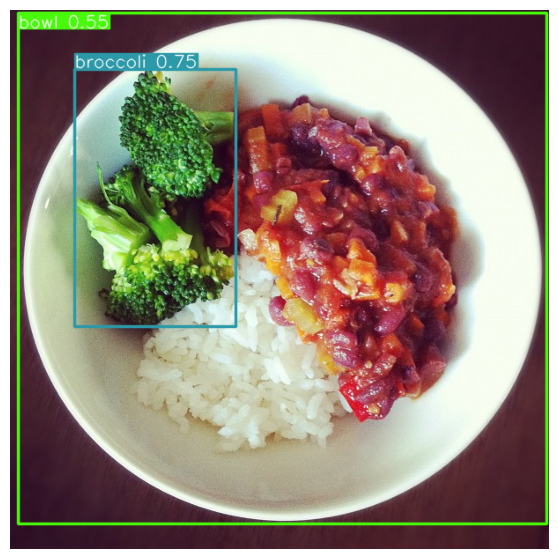

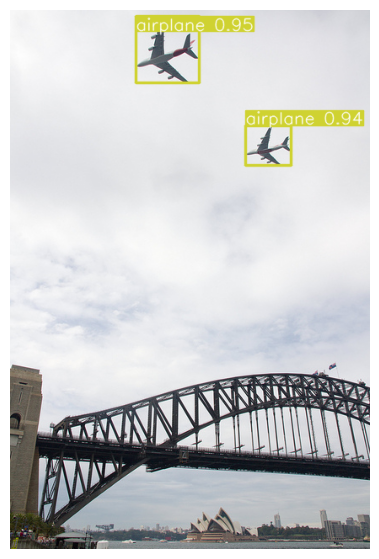

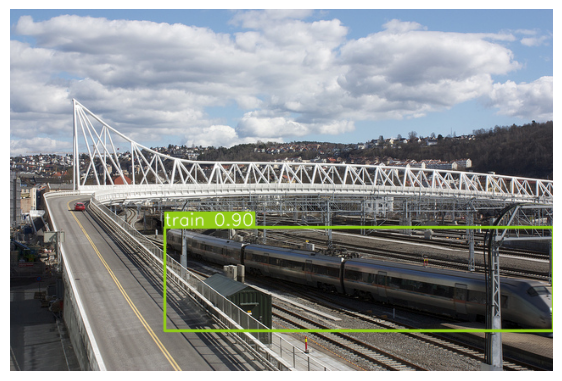

In [8]:
COUNT_IMG_DISPLAY = 3
rand_img_idx = np.random.randint(1, len(img_names), COUNT_IMG_DISPLAY)
conf_threshold = 0.5

for idx in rand_img_idx:
    img = cv2.imread(os.path.join(DATA_PATH, img_names[idx]))
    result = model.predict(img, device="0", imgsz = 640, conf=0.5, verbose=False)
    
    plot_detection_result(result[0])


In [9]:
MODELS = "nsmlx"
COUNT_IMG_INFERENCE = 100
BATCH_SIZES = [1, 2, 4, 8, 16]
DETECT_CONFIG = {
    "device": "0",
    "imgsz": 640,
    "conf": 0.5, 
    "verbose": False # Выводить в консоль inference по каждому
}


In [10]:
benchmark_df = performance.detection_performance(DATA_PATH, MODELS, BATCH_SIZES, COUNT_IMG_INFERENCE, DETECT_CONFIG)
benchmark_df.to_csv("./reports/performance/detect.csv", sep=";")
benchmark_df

Process yolov8n.pt


d:\Programming\Diploma ver. 2\Mot\utils\performance.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  benchmark_df = pd.concat([benchmark_df, df], ignore_index = True)


Process yolov8s.pt
Process yolov8m.pt
Process yolov8l.pt
Process yolov8x.pt


,model,batch_size,prepocess_time,inference_time,postprocess_time,total_time,avg_fps
0,yolov8n.pt,1,1.323055,18.557903,3.119596,23.000553,43.477215
1,yolov8n.pt,2,3.778791,9.341362,2.470148,15.590300,64.142446
2,yolov8n.pt,4,2.353492,6.942846,1.795620,11.091957,90.155412
3,yolov8n.pt,8,2.010698,4.918987,1.541460,8.471145,118.047798
4,yolov8n.pt,16,2.362731,3.781638,1.847261,7.991630,125.130921
5,yolov8s.pt,1,1.161390,18.610338,3.496213,23.267941,42.977589
6,yolov8s.pt,2,2.792894,9.784735,3.597880,16.175508,61.821859
7,yolov8s.pt,4,2.030830,7.815537,2.991036,12.837403,77.897378
8,yolov8s.pt,8,2.447025,7.560042,2.084304,12.091371,82.703606
9,yolov8s.pt,16,1.848301,6.469712,1.454085,9.772098,102.332170


In [11]:
yt = YouTube('https://www.youtube.com/watch?v=KBsqQez-O4w')
video_name = "traffic.mp4"
video_path = f"./datasets/video/{video_name}"
if (not os.path.exists(video_path)):
    yt.streams.filter(res="720p", file_extension="mp4").first().download(filename=video_name)

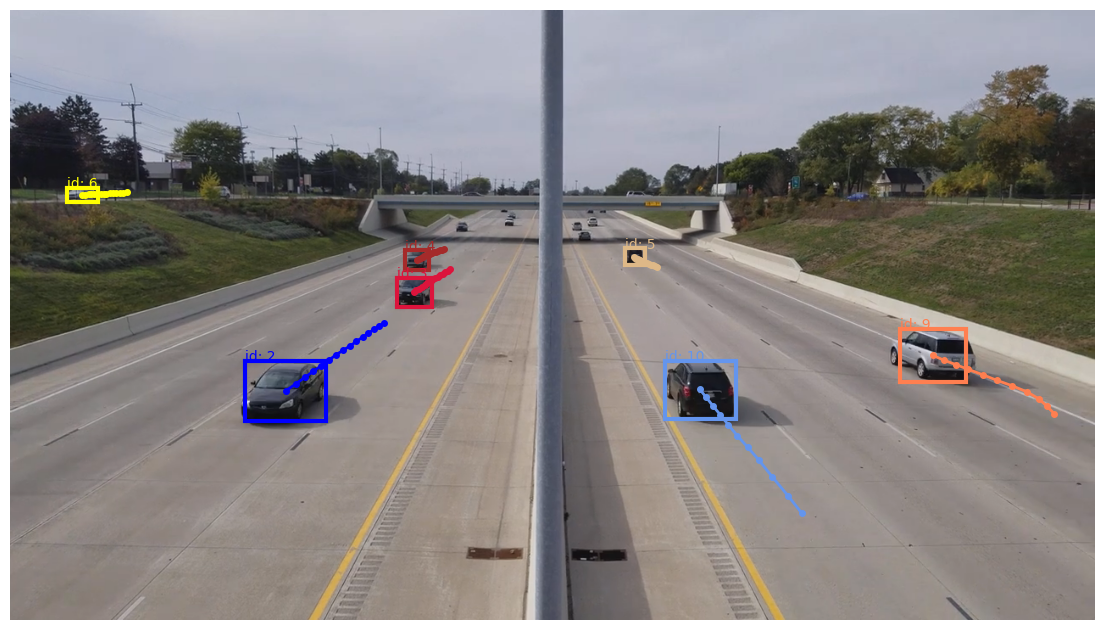

<Figure size 1400x1400 with 0 Axes>

In [12]:
TRACK_CONFIG = {
    "device": "0",
    "imgsz": (640, 640),
    "conf": 0.1,
    "iou": 0.4, 
    "tracker": 'bytetrack.yaml',
    "verbose": False, # Выводить в консоль inference по каждому
}
model = YOLO('yolov8l.pt')
MAX_COUNT_PROCESSED_IMG = 25
video_path = f"./datasets/video/traffic.mp4"

plotting.plt_show_tracker(video_path, model, MAX_COUNT_PROCESSED_IMG, TRACK_CONFIG)

In [13]:
TRACK_CONFIG = {
    "device": "0",
    "imgsz": (640, 640),
    "conf": 0.15,
    "iou": 0.3, 
    "tracker": 'bytetrack.yaml',
    "verbose": False, # Выводить в консоль inference по каждому
}
MODELS = "nsmlx"
video_path = f"./datasets/video/traffic.mp4"
img_process = 1000

benchmark_df = performance.video_performance_mot(video_path, MODELS, TRACK_CONFIG, img_process)
print()
benchmark_df.to_csv("./reports/performance/bytetrack_track_inference.csv", sep=";")
benchmark_df

Process yolov8n.pt


d:\Programming\Diploma ver. 2\Mot\utils\performance.py:130: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  benchmark_df = pd.concat([benchmark_df, df], ignore_index = True)


Process yolov8s.pt
Process yolov8m.pt
Process yolov8l.pt
Process yolov8x.pt



,model,prepocess_time,inference_time,postprocess_time,total_time,avg_fps
0,yolov8n.pt,1.786577,12.887935,2.673616,17.348128,57.643107
1,yolov8s.pt,1.679903,13.167260,2.893044,17.740206,56.369130
2,yolov8m.pt,1.750050,17.914390,2.768920,22.433360,44.576469
3,yolov8l.pt,2.046037,29.958724,2.992622,34.997383,28.573565
4,yolov8x.pt,1.899423,52.289399,2.686193,56.875015,17.582413


In [14]:
TRACK_CONFIG = {
    "device": "0",
    "imgsz": (640, 640),
    "conf": 0.15,
    "iou": 0.3, 
    "tracker": 'botsort.yaml',
    "verbose": False, # Выводить в консоль inference по каждому
}
MODELS = "nsmlx"
video_path = f"./datasets/video/traffic.mp4"
img_process = 1000

benchmark_df = performance.video_performance_mot(video_path, MODELS, TRACK_CONFIG, img_process)
print()
benchmark_df.to_csv("./reports/performance/botsort_track_inference.csv", sep=";")
benchmark_df

Process yolov8n.pt


d:\Programming\Diploma ver. 2\Mot\utils\performance.py:130: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  benchmark_df = pd.concat([benchmark_df, df], ignore_index = True)


Process yolov8s.pt
Process yolov8m.pt
Process yolov8l.pt
Process yolov8x.pt



,model,prepocess_time,inference_time,postprocess_time,total_time,avg_fps
0,yolov8n.pt,3.020901,18.728034,3.004350,24.753284,40.398680
1,yolov8s.pt,2.058545,16.596224,2.876672,21.531442,46.443708
2,yolov8m.pt,1.752220,20.021656,2.623562,24.397438,40.987911
3,yolov8l.pt,1.845417,27.378095,2.813684,32.037197,31.213717
4,yolov8x.pt,1.937747,49.296145,2.875520,54.109411,18.481073


In [16]:
model_name = 'yolov8l.pt'
TRACK_CONFIG = {
    "device": "0",
    "imgsz": (640, 640),
    "conf": 0.15,
    "iou": 0.3, 
    "tracker": 'botsort.yaml',
    "verbose": False, # Выводить в консоль inference по каждому
}
plotting.tracker_inference_video(model_name, "./datasets/video/traffic.mp4", "./output/botsort_v8l.mp4", TRACK_CONFIG, 300)


In [17]:
plotting.tracker_inference_video(model_name, "./datasets/video/traffic_big.mp4", "./output/botsort_v8l_hard.mp4", TRACK_CONFIG, 300)

In [ ]:
model_name = 'yolov8l.pt'
TRACK_CONFIG = {
    "device": "0",
    "imgsz": (640, 640),
    "conf": 0.15,
    "iou": 0.3, 
    "tracker": 'botsort.yaml',
    "verbose": False, # Выводить в консоль inference по каждому
}
plotting.tracker_inference_video(model_name, "./datasets/video/traffic.mp4", "./output/bytetrack_v8l.mp4", TRACK_CONFIG, 300)

In [ ]:
plotting.tracker_inference_video(model_name, "./datasets/video/traffic_big.mp4", "./output/bytetrack_v8l_hard.mp4", TRACK_CONFIG, 300)